# `STREAM_analysis.ipynb`

Notebook started on 2/5/18 to repeat and extend Bei Wang's analysis of the STREAM microbenchmark (part of the [HPC Challenge Benchmark](http://icl.cs.utk.edu/hpcc/)) on PICSciE computers.

> STREAM - a simple synthetic benchmark program that measures sustainable memory bandwidth (in GB/s) and the corresponding computation rate for simple vector kernel.

In [1]:
# Core notebook options, matplotlib modules
%reset -f
%load_ext autoreload
%autoreload 2

#%matplotlib notebook
# Use inline plotting to save system resources when creating many plots
%matplotlib inline
from __future__ import print_function

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
notebook_figsize = matplotlib.rcParams['figure.figsize']

import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
# for producing vector inline graphics upon notebook PDF conversion with magic %matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') 
# Increase dpi to avoid inconsistent grid lines and imshow cells
dpi_global = 300 # Using for both Figure objects, and Figure.savefig() calls

## Load CSV results from subdirectories
### Perseus Broadwell

In [13]:
col_names = ['nthreads', 
             'Copy bandwidth (MB/s)', 'Copy avg (s)', 'Copy min (s)', 'Copy max (s)',
             'Scale bandwidth (MB/s)', 'Scale avg (s)', 'Scale min (s)', 'Scale max (s)',
             'Add bandwidth (MB/s)', 'Add avg (s)', 'Add min (s)', 'Add max (s)',
             'Triad bandwidth (MB/s)', 'Triad avg (s)', 'Triad min (s)', 'Triad max (s)'
            ]             
perseus_dualsocket = pd.read_csv('./perseus/perseus_STREAM_results.txt', comment='#', delimiter=' ', names=col_names)
perseus_singlesocket = pd.read_csv('./perseus/perseus_STREAM_results_single_socket.txt', comment='#', delimiter=' ', names=col_names)

## TigerCPU S

# Boxplot visualization 
In the style of Simakov (2018) Fig. 2., 3x2 array of plots.

## Sod comparisons

In [5]:
# Rescale to millions of zone-cycles / second
sod_prepatch_plm_hlle_mb8 = np.array(sod_prepatch_plm_hlle_mb8) / 1e6
sod_prepatch_plm_hllc_mb8 = np.array(sod_prepatch_plm_hllc_mb8) / 1e6
sod_prepatch_plm_roe_mb8 = np.array(sod_prepatch_plm_roe_mb8) / 1e6
sod_prepatch_plm_hlle_mb64 = np.array(sod_prepatch_plm_hlle_mb64) / 1e6
sod_prepatch_plm_hllc_mb64 = np.array(sod_prepatch_plm_hllc_mb64) / 1e6
sod_prepatch_plm_roe_mb64 = np.array(sod_prepatch_plm_roe_mb64) / 1e6

In [6]:
sod_postpatch_plm_hlle_mb8 = np.array(sod_postpatch_plm_hlle_mb8) / 1e6
sod_postpatch_plm_hllc_mb8 = np.array(sod_postpatch_plm_hllc_mb8) / 1e6
sod_postpatch_plm_roe_mb8 = np.array(sod_postpatch_plm_roe_mb8) / 1e6
sod_postpatch_plm_hlle_mb64 = np.array(sod_postpatch_plm_hlle_mb64) / 1e6
sod_postpatch_plm_hllc_mb64 = np.array(sod_postpatch_plm_hllc_mb64) / 1e6
sod_postpatch_plm_roe_mb64 = np.array(sod_postpatch_plm_roe_mb64) / 1e6

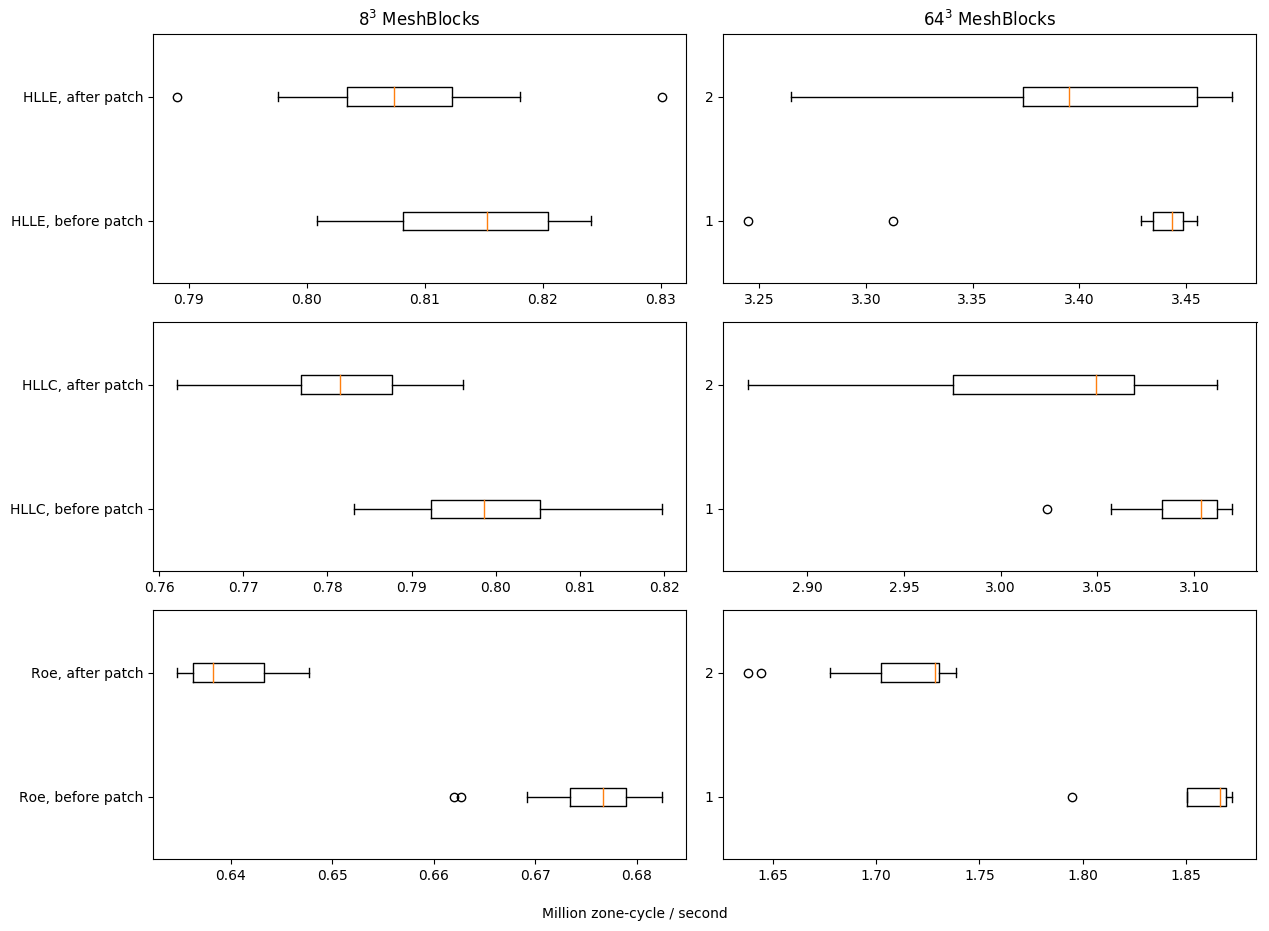

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2)

# First column, 8^3 MeshBlocks
ax = axes[0][0]
ax.boxplot([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8],vert=False, labels=['HLLE, before patch', 'HLLE, after patch'])
ax.set_title(r'$8^3$ MeshBlocks')

ax = axes[1][0]
ax.boxplot([sod_prepatch_plm_hllc_mb8, sod_postpatch_plm_hllc_mb8],vert=False, labels=['HLLC, before patch', 'HLLC, after patch'])

ax = axes[2][0]
ax.boxplot([sod_prepatch_plm_roe_mb8, sod_postpatch_plm_roe_mb8],vert=False, labels=['Roe, before patch', 'Roe, after patch'])

# Second column, 64^3 MeshBlocks
ax = axes[0][1]
ax.boxplot([sod_prepatch_plm_hlle_mb64, sod_postpatch_plm_hlle_mb64], vert=False)#, labels=['Before patch', 'After patch'])
ax.set_title(r'$64^3$ MeshBlocks')

ax = axes[1][1]
ax.boxplot([sod_prepatch_plm_hllc_mb64, sod_postpatch_plm_hllc_mb64],vert=False) #, labels=['Before patch', 'After patch'])

ax = axes[2][1]
ax.boxplot([sod_prepatch_plm_roe_mb64, sod_postpatch_plm_roe_mb64],vert=False) #, labels=['Before patch', 'After patch'])

fig.tight_layout()
fig.suptitle('Million zone-cycle / second', x=0.5, y=0.05, fontsize=10) # verticalalignment='bottom')
fig.subplots_adjust(bottom=0.1)

### Explore Pandas+Seaborn alternative

In [8]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

{'boxes': [<matplotlib.lines.Line2D at 0x110468150>,
 'caps': [<matplotlib.lines.Line2D at 0x110468b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x110472750>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x110472350>,
 'whiskers': [<matplotlib.lines.Line2D at 0x110468250>,
  <matplotlib.lines.Line2D at 0x11047c390>]}

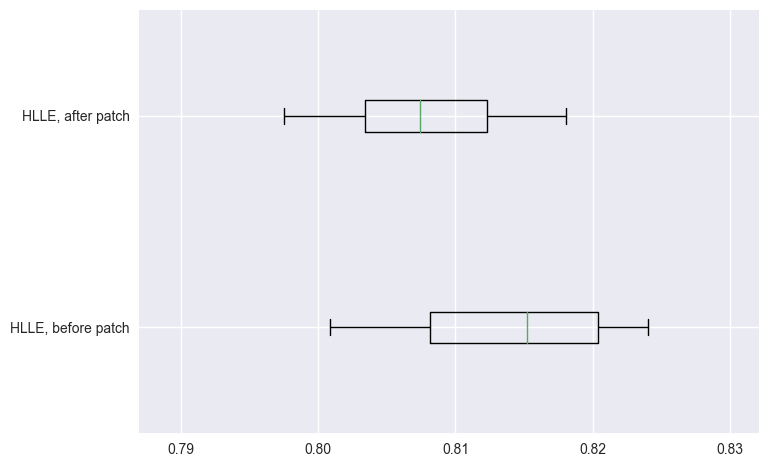

In [8]:
plt.style.use('seaborn')
# Unlike https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/ , it appears simply loading
# seaborn does not overwrite the default matplotlib style
plt.boxplot([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8],vert=False, labels=['HLLE, before patch', 'HLLE, after patch'])

(20, 2)


<IPython.core.display.Javascript object>


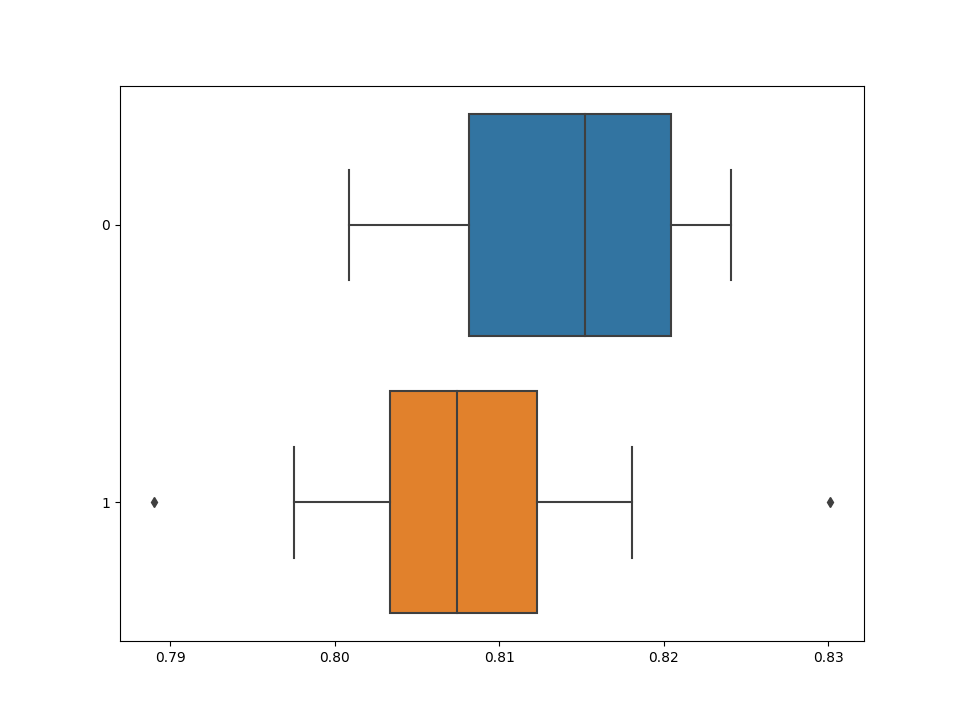

In [13]:
test_array = np.transpose(np.vstack([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8]))
print(test_array.shape)

# This produces the correct plot, but I am unable to get the correct dims for labels
#sns.boxplot(data=test_array, orient='h')#, labels=['HLLE, before patch', 'HLLE, after patch'])

# List of np.array() does not work
# sns.boxplot([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8])

In [71]:
# Follow https://stackoverflow.com/questions/45470882/x-y-z-array-data-to-heatmap

# Create Pandas dataframe
# I believe that the multidimensional Numpy array (numpy.ndarray) ducktypes like a dictionary here, hence from_dict()
# E.g. consider a specific case of a Numpy Structured Array (numpy.void), which is a ndarray with struct datatypes
df_hlle = pd.DataFrame.from_dict(np.array([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8]).T)
df_hlle.columns = ['Before patch', 'After patch']

In [72]:
# This creates a "wide-form" dataframe
# https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/
df_hlle
# df_hlle.pivot()

,Before patch,After patch
0,0.820315,0.803730
1,0.800883,0.803194
2,0.816058,0.803373
3,0.824052,0.789005
4,0.817719,0.815874
5,0.821246,0.807317
6,0.808219,0.818088
7,0.819015,0.809485
8,0.820687,0.812576
9,0.802482,0.807497


In [75]:
# This dataframe structure inappropriate, because the int row index is relating completely independent trials in the Before and After columns. This can be observed when stacking the DataFrame to produce a Series (since single col) with hierarchical index
print(df_hlle.stack().head())
#type(df_hlle.stack())

0  Before patch    0.820315
   After patch     0.803730
1  Before patch    0.800883
   After patch     0.803194
2  Before patch    0.816058
dtype: float64


<IPython.core.display.Javascript object>


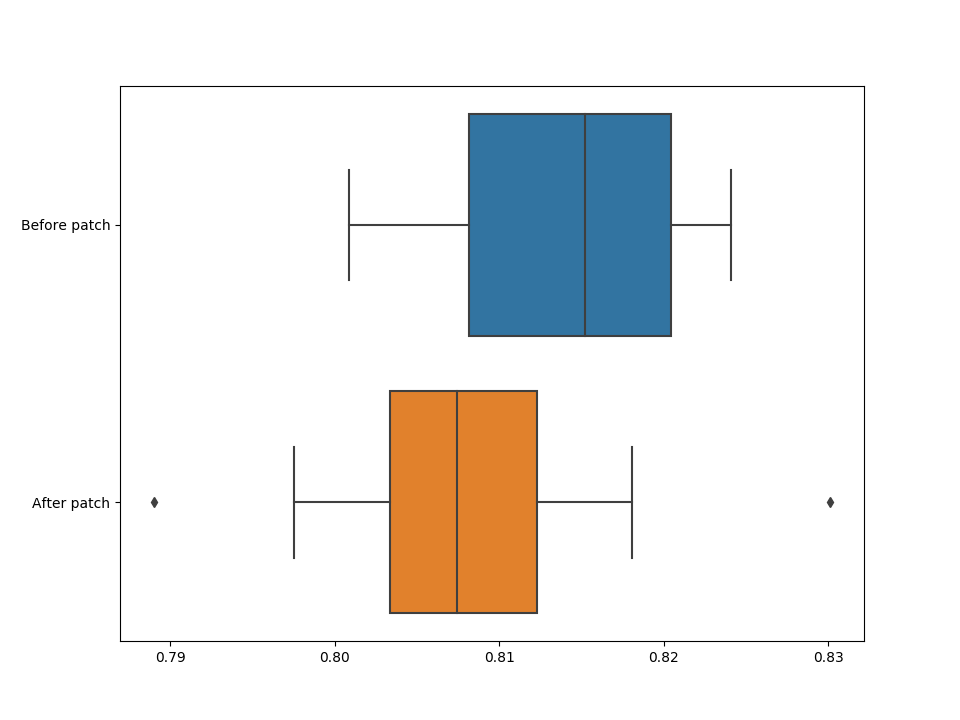

In [27]:
# If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.
# A “wide-form” DataFrame, such that each numeric column will be plotted.

# Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.
# Draw a boxplot for each numeric variable in a DataFrame by ommitting x,y and using orient:
sns.boxplot(data=df_hlle, orient="h") # Produces only a single boxplot if orient="h" is ommitted

   zonecycles kernel_patch
0    0.820315       before
1    0.800883       before
2    0.816058       before
3    0.824052       before
4    0.817719       before


<IPython.core.display.Javascript object>


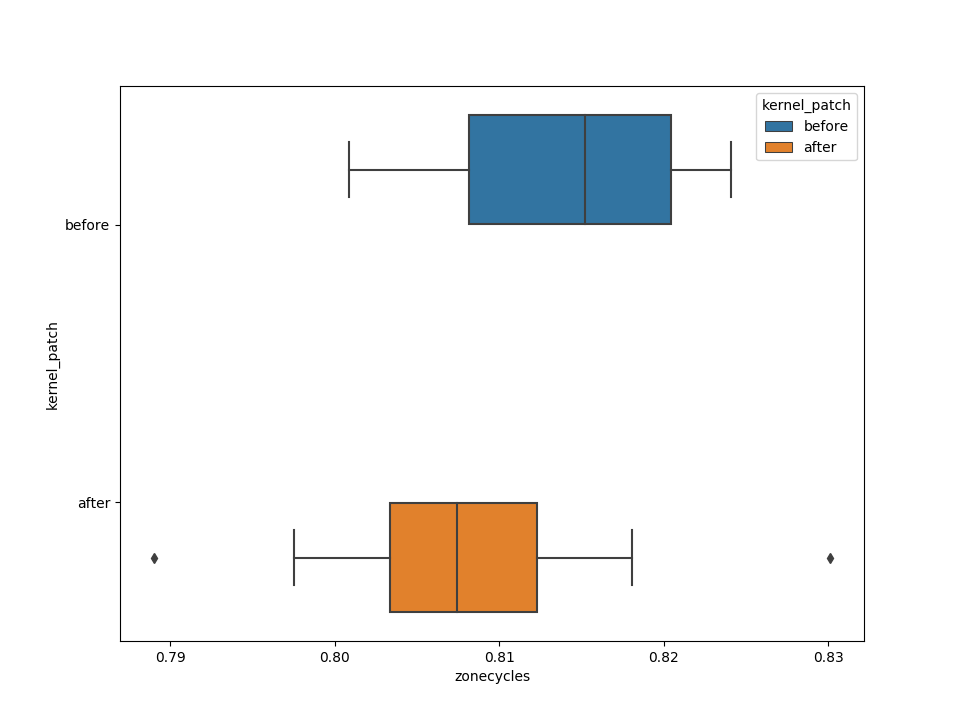

In [6]:
# The DataFrame should be structured in long-form (with "before" and "after kernel" as var entries in a column) for maximum flexibility 
# Consider the Seaborn examples
# tips = sns.load_dataset("tips")

# A rudimentary way to achieve this is to manually assign the "before" and "after" vars
np.concatenate((sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8))
df_hlle = pd.DataFrame(np.concatenate((sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8)))
df_hlle.columns = ['zonecycles']
df_hlle['kernel_patch'] = 'before'
df_hlle.loc[df_hlle.index.isin(range(20,40)), 'kernel_patch'] = 'after'
print(df_hlle.head())
sns.boxplot(x='zonecycles', y='kernel_patch', hue='kernel_patch', data=df_hlle)
# (a better way to do this uses df.assign(), see pg 87 in BuJo #2)

In [7]:
# The optimal solution to convert the dataframe to a long-form suitable for use with seaborn involves the use of melt. See * https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/
# https://stackoverflow.com/questions/44552489/plotting-multiple-boxplots-in-seaborn
print(df_hlle.melt(var_name="kernel", value_name="zonecycles").head())

       kernel zonecycles
0  zonecycles   0.820315
1  zonecycles   0.800883
2  zonecycles   0.816058
3  zonecycles   0.824052
4  zonecycles   0.817719


In [70]:
# Jose Ferreira's proposed automated solution (useful in the case of many arrays)
arrays = np.array([sod_prepatch_plm_hlle_mb8, sod_postpatch_plm_hlle_mb8])
print(arrays.shape)
series = [pd.DataFrame({'times':a, 'membership':i*np.ones(len(a), dtype=np.int32)}) for i, a in enumerate(arrays)]
df = pd.concat(series, axis=0)
print(df.head())

(2, 20)
   membership     times
0           0  0.820315
1           0  0.800883
2           0  0.816058
3           0  0.824052
4           0  0.817719


### Seaborn plot using long-form Pandas dataframe

In [7]:
# 8^3 MeshBlock results
df1 = pd.DataFrame.from_dict(np.array([np.concatenate([sod_prepatch_plm_hlle_mb8, sod_prepatch_plm_hllc_mb8, sod_prepatch_plm_roe_mb8]), np.concatenate([sod_postpatch_plm_hlle_mb8, sod_postpatch_plm_hllc_mb8, sod_postpatch_plm_roe_mb8])]).T)
df1.columns = ['Before patch', 'After patch']

# No real way to assign in-place since inplace=True is a kwarg? Always returns a new copy of the dataframe.
# Use df.insert() instead
# https://stackoverflow.com/questions/39767718/pandas-assign-with-new-column-name-as-string
rsolvers = ['HLLE']*len(sod_prepatch_plm_hlle_mb8) + ['HLLC']*len(sod_prepatch_plm_hllc_mb8) + ['Roe']*len(sod_prepatch_plm_roe_mb8)
kwargs = {"Riemann solver" : lambda x: rsolvers, "MeshBlock length" : "8"}
df1 = df1.assign(**kwargs)
# print(df1.head())
df1 = df1.melt(id_vars=['Riemann solver', 'MeshBlock length'], var_name='Kernel', value_name='Million zone-cycles/sec')
print(df1.head())

  Riemann solver MeshBlock length        Kernel  Million zone-cycles/sec
0           HLLE                8  Before patch                 0.820315
1           HLLE                8  Before patch                 0.800883
2           HLLE                8  Before patch                 0.816058
3           HLLE                8  Before patch                 0.824052
4           HLLE                8  Before patch                 0.817719


In [8]:
df1.dtypes

Riemann solver              object
MeshBlock length            object
Kernel                      object
Million zone-cycles/sec    float64
dtype: object

In [9]:
# 64^3 MeshBlock results
# Note, the 8^3 results are all NumPy arrays with 20 trials, hence shape (20 , ) (these 1D NumPy arrays can behave like row vectors or col vectors). Therefore the outer joining of the 2x (60, 0) concatenated arrays results in (2, 60) array
# In contrast, the 64^3 prepatch results include the Roe array with shape (5, ). Therefore the outer joining of the (45, 0) and (60, 0) arrays results in a jagged structured array. 
# Hence, for this set of Roe results, we need to create separate dataframes (and then melt each of them) before creating the overall dataframe
df2 = pd.DataFrame.from_dict(np.vstack((np.concatenate((sod_prepatch_plm_hlle_mb64,sod_prepatch_plm_hllc_mb64)), np.concatenate((sod_postpatch_plm_hlle_mb64,sod_postpatch_plm_hllc_mb64)))).T)
df2.columns = ['Before patch', 'After patch']
rsolvers = ['HLLE']*len(sod_prepatch_plm_hlle_mb64) + ['HLLC']*len(sod_prepatch_plm_hllc_mb64)
kwargs = {"Riemann solver" : lambda x: rsolvers, "MeshBlock length" : "64"}
df2 = df2.assign(**kwargs)
df2 = df2.melt(id_vars=['Riemann solver', 'MeshBlock length'], var_name='Kernel', value_name='Million zone-cycles/sec')
print(df2.head())

  Riemann solver MeshBlock length        Kernel  Million zone-cycles/sec
0           HLLE               64  Before patch                 3.448606
1           HLLE               64  Before patch                 3.428993
2           HLLE               64  Before patch                 3.438771
3           HLLE               64  Before patch                 3.451896
4           HLLE               64  Before patch                 3.428993


In [10]:
df2.dtypes

Riemann solver              object
MeshBlock length            object
Kernel                      object
Million zone-cycles/sec    float64
dtype: object

In [11]:
# Direct construction of the melted/long-form DataFrame
# This method causes "Million zone-cycles/sec" to be of dtype=object since we create a NumPy structured array
# df_roe_prepatch_64 = pd.DataFrame(np.array([['Roe']*len(sod_prepatch_plm_roe_mb64), [64]*len(sod_prepatch_plm_roe_mb64), ['Before patch']*len(sod_prepatch_plm_roe_mb64), sod_prepatch_plm_roe_mb64]).T)
df_roe_prepatch_64 = pd.DataFrame(np.array([['Roe']*len(sod_prepatch_plm_roe_mb64), [64]*len(sod_prepatch_plm_roe_mb64), ['Before patch']*len(sod_prepatch_plm_roe_mb64)]).T)
df_roe_prepatch_64.insert(3, 'newcol', sod_prepatch_plm_roe_mb64)
df_roe_prepatch_64.columns = df2.columns

df_roe_postpatch_64 = pd.DataFrame(np.array([['Roe']*len(sod_postpatch_plm_roe_mb64), [64]*len(sod_postpatch_plm_roe_mb64), ['After patch']*len(sod_postpatch_plm_roe_mb64)]).T)
df_roe_postpatch_64.insert(3, 'newcol', sod_postpatch_plm_roe_mb64)
df_roe_postpatch_64.columns = df2.columns

# Manually append the Roe results
df_sod = pd.concat([df1, df2, df_roe_prepatch_64, df_roe_postpatch_64], ignore_index=True) # not sure why this option is necessary here but is not if df_sod = pd.concat([df1, df2]

In [12]:
df_sod.dtypes

Riemann solver              object
MeshBlock length            object
Kernel                      object
Million zone-cycles/sec    float64
dtype: object

[[]]

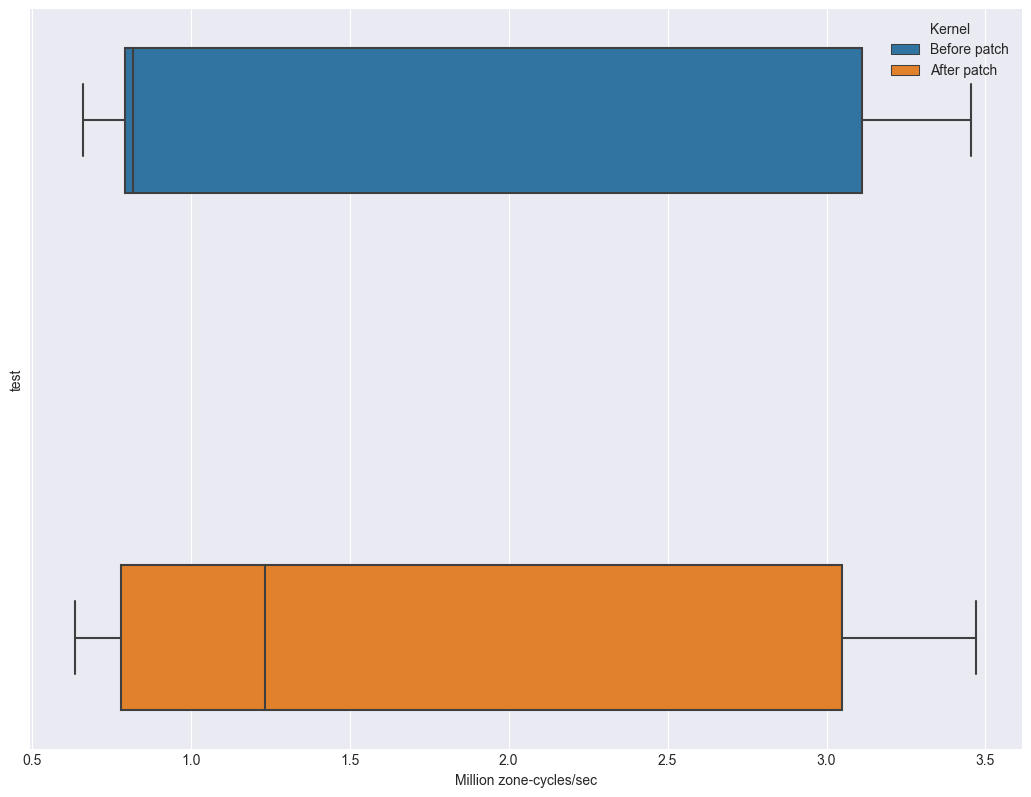

In [38]:
ax =sns.boxplot(x='Million zone-cycles/sec', y='Kernel', hue='Kernel', data=df_sod)
ax.set(ylabel='test')
ax.set(yticks=[])

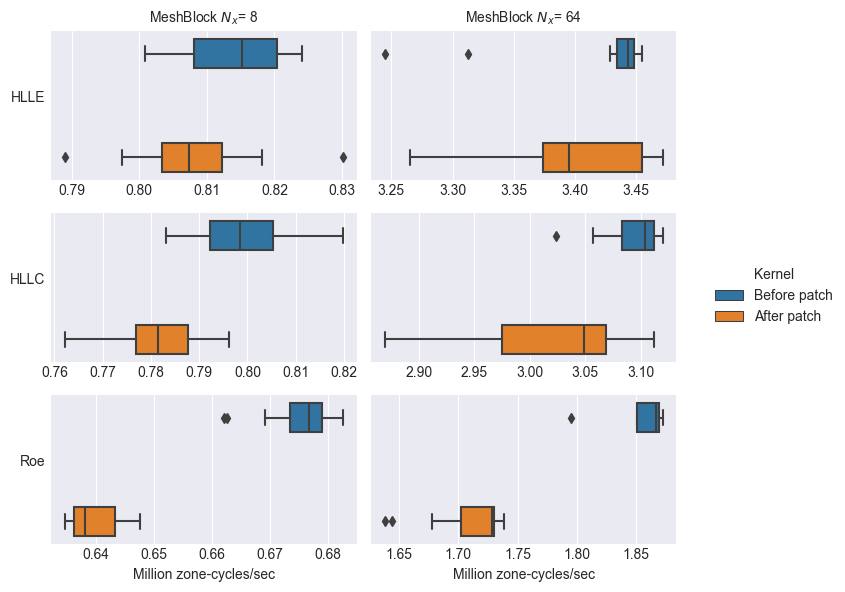

In [13]:
#sns.boxplot(y='Million zone-cycles/sec', x='Kernel', data=df_sod)
sns.set_style('darkgrid')
#sns.set_style('whitegrid')
g = sns.factorplot(x='Million zone-cycles/sec', y="Kernel", hue='Kernel', col='MeshBlock length', row='Riemann solver', data=df_sod, kind="box", col_order=["8", "64"], legend=True, legend_out=True,
               sharey=True, sharex=False, aspect=2.0, size=2, margin_titles=True) #Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.


#plt.legend() # puts legend in last facet
# It appears that "inline" matplotlib backend for Jupyter is needed in order to avoid truncating the legend_out

# https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn?rq=1
g.set(ylabel='')#, rotation='horizontal')) # rotation=0)
#g.set_ylabels(['HLLE', 'HLLC', 'Roe'], rotation=0)
# https://seaborn.pydata.org/tutorial/axis_grids.html
#g.set_axis_labels('MeshBlock length', 'Riemann solver')

# size : Height (in inches) of each facet
# aspect : Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches.

# Manually add ylabels to the left of rows of plots
row_ylabels = ['HLLE', '',
              'HLLC', '',
              'Roe', '']
for ax,ylab in zip(g.axes.flat, row_ylabels):
    # https://stackoverflow.com/questions/36253677/rotating-matplotlib-tick-labels-causes-weird-spacing-issues
    ax.set_ylabel(ylab,rotation='horizontal', ha='right')
    ax.set_yticks([])

# Finally found fix to seaborn FacetGrid annotations: http://wckdouglas.github.io/2016/12/seaborn_annoying_title
# Delete the margin_titles to the right of each row
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', col_template = 'MeshBlock $N_x$= {col_name}')
# fig = ax.get_figure()
#fig.tight_layout()

In [16]:
type(g)
#dir(g)

seaborn.axisgrid.FacetGrid

In [17]:
g.fig.savefig("perseus_sod_kernel_boxplot.pdf", dpi=dpi_global, bbox_inches='tight')

## Brio-Wu comparisons

In [18]:
# Rescale to millions of zone-cycles / second
bw_prepatch_plm_hlle_mb64 = np.array(bw_prepatch_plm_hlle_mb64) / 1e6
bw_prepatch_plm_hlld_mb64 = np.array(bw_prepatch_plm_hlld_mb64) / 1e6
bw_prepatch_plm_roe_mb64 = np.array(bw_prepatch_plm_roe_mb64) / 1e6
bw_postpatch_plm_hlle_mb64 = np.array(bw_postpatch_plm_hlle_mb64) / 1e6
bw_postpatch_plm_hlld_mb64 = np.array(bw_postpatch_plm_hlld_mb64) / 1e6
bw_postpatch_plm_roe_mb64 = np.array(bw_postpatch_plm_roe_mb64) / 1e6

<IPython.core.display.Javascript object>


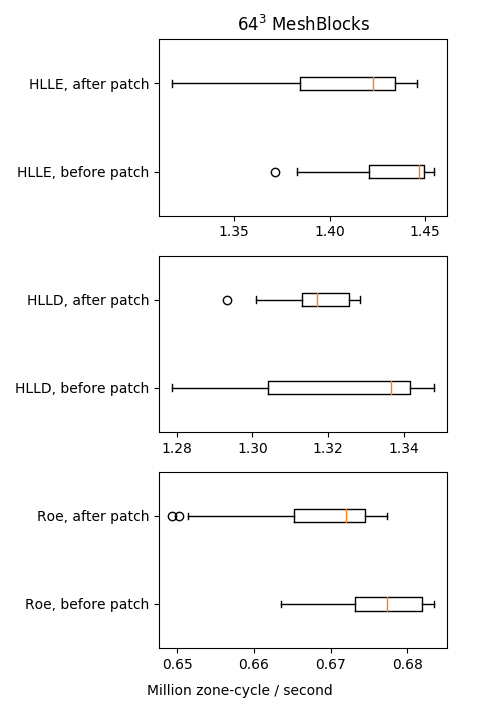

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(0.5*notebook_figsize[0], notebook_figsize[1]))

# Only column, 64^3 MeshBlocks
ax = axes[0]
ax.boxplot([bw_prepatch_plm_hlle_mb64, bw_postpatch_plm_hlle_mb64], vert=False, labels=['HLLE, before patch', 'HLLE, after patch'])
ax.set_title(r'$64^3$ MeshBlocks')

ax = axes[1]
ax.boxplot([bw_prepatch_plm_hlld_mb64, bw_postpatch_plm_hlld_mb64],vert=False, labels=['HLLD, before patch', 'HLLD, after patch'])

ax = axes[2]
ax.boxplot([bw_prepatch_plm_roe_mb64, bw_postpatch_plm_roe_mb64],vert=False, labels=['Roe, before patch', 'Roe, after patch'])

fig.tight_layout()
fig.suptitle('Million zone-cycle / second', x=0.5, y=0.05, fontsize=10) # verticalalignment='bottom')
fig.subplots_adjust(bottom=0.1)

### Seaborn plot using long-form Pandas dataframe

In [19]:
# 64^3 MeshBlock results
df_bw = pd.DataFrame.from_dict(np.array([np.concatenate([bw_prepatch_plm_hlle_mb64, bw_prepatch_plm_hlld_mb64, bw_prepatch_plm_roe_mb64]), np.concatenate([bw_postpatch_plm_hlle_mb64, bw_postpatch_plm_hlld_mb64, bw_postpatch_plm_roe_mb64])]).T)
df_bw.columns = ['Before patch', 'After patch']

# No real way to assign in-place since inplace=True is a kwarg? Always returns a new copy of the dataframe.
# Use df.insert() instead
# https://stackoverflow.com/questions/397677164/pandas-assign-with-new-column-name-as-string
rsolvers = ['HLLE']*len(bw_prepatch_plm_hlle_mb64) + ['HLLD']*len(bw_prepatch_plm_hlld_mb64) + ['Roe']*len(bw_prepatch_plm_roe_mb64)
kwargs = {"Riemann solver" : lambda x: rsolvers, "MeshBlock length" : "64"}
df_bw = df_bw.assign(**kwargs)
# print(df_bw.head())
df_bw = df_bw.melt(id_vars=['Riemann solver', 'MeshBlock length'], var_name='Kernel', value_name='Million zone-cycles/sec')
print(df_bw.head())

  Riemann solver MeshBlock length        Kernel  Million zone-cycles/sec
0           HLLE               64  Before patch                 1.371609
1           HLLE               64  Before patch                 1.449582
2           HLLE               64  Before patch                 1.449582
3           HLLE               64  Before patch                 1.454845
4           HLLE               64  Before patch                 1.448833


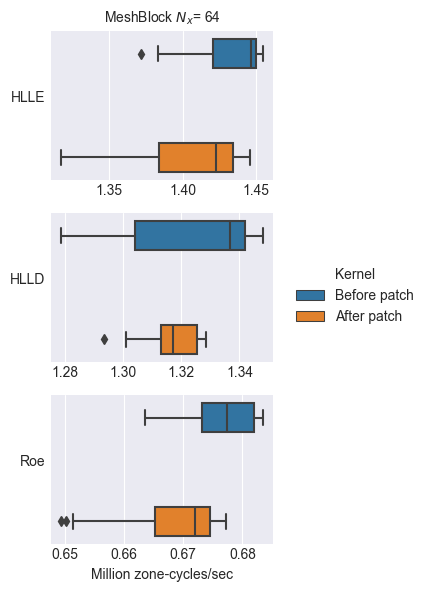

In [20]:
sns.set_style('darkgrid')
g = sns.factorplot(x='Million zone-cycles/sec', y="Kernel", hue='Kernel', col='MeshBlock length', row='Riemann solver', data=df_bw, kind="box", legend=True, legend_out=True,
               sharey=True, sharex=False, aspect=2.0, size=2, margin_titles=True) #Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.


#plt.legend() # puts legend in last facet
# It appears that "inline" matplotlib backend for Jupyter is needed in order to avoid truncating the legend_out

# https://stackoverflow.com/questions/24497172/remove-yaxis-values-from-facetgrid-in-seaborn?rq=1
g.set(ylabel='')#, rotation='horizontal')) # rotation=0)

row_ylabels = ['HLLE',
              'HLLD',
              'Roe', ]
for ax,ylab in zip(g.axes.flat, row_ylabels):
    # https://stackoverflow.com/questions/36253677/rotating-matplotlib-tick-labels-causes-weird-spacing-issues
    ax.set_ylabel(ylab,rotation='horizontal', ha='right')
    ax.set_yticks([])

# Finally found fix to seaborn FacetGrid annotations: http://wckdouglas.github.io/2016/12/seaborn_annoying_title
# Delete the margin_titles to the right of each row
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '', col_template = 'MeshBlock $N_x$= {col_name}')
# fig = ax.get_figure()
#fig.tight_layout()

In [21]:
g.fig.savefig("perseus_bw_kernel_boxplot.pdf", dpi=dpi_global, bbox_inches='tight')

# Perform Welch's t-test
Using this to determine if the two sample mean runtimes/zonecycles (pre- and post-patch) are actually identical.

As in Simokov (2018), we let $\alpha=0.05$ for all tests.

## Sod 

In [ ]:
# This is the inverse of "melting". 
df_sod.pivot(columns='Kernel', values='Million zone-cycles/sec')
tbl= pd.pivot_table(df_sod, index=['Riemann solver', 'MeshBlock length'], columns='Kernel', values='Million zone-cycles/sec') # default aggfunc is numpy.mean for aggregating duplicates

In [70]:
# Create a multi-indexed dataframe
df_multi = df_sod.set_index(['Riemann solver', 'MeshBlock length'])#, 'Kernel'])

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(df_multi)

Kernel  Million zone-cycles/sec
Riemann solver MeshBlock length                                       
HLLE           8                 Before patch                 0.820315
               8                 Before patch                 0.800883
               8                 Before patch                 0.816058
               8                 Before patch                 0.824052
               8                 Before patch                 0.817719
               8                 Before patch                 0.821246
               8                 Before patch                 0.808219
               8                 Before patch                 0.819015
               8                 Before patch                 0.820687
               8                 Before patch                 0.802482
               8                 Before patch                 0.819943
               8                 Before patch                 0.810210
               8                 Before patch                 0.807677
               8                 Before patch                 0.823302
               8                 Before patch                 0.800883
               8                 Before patch                 0.813672
               8                 Before patch                 0.812029
               8                 Before patch                 0.820687
               8                 Before patch                 0.808038
               8                 Before patch                 0.814405
HLLC           8                 Before patch                 0.791443
               8                 Before patch                 0.790070
               8                 Before patch                 0.805082
               8                 Before patch                 0.800660
               8                 Before patch                 0.800484
               8                 Before patch                 0.794549
               8                 Before patch                 0.795243
               8                 Before patch                 0.796111
               8                 Before patch                 0.788190
               8                 Before patch                 0.783108
               8                 Before patch                 0.815898
               8                 Before patch                 0.805616
               8                 Before patch                 0.808117
               8                 Before patch                 0.813530
               8                 Before patch                 0.819753
               8                 Before patch                 0.801540
               8                 Before patch                 0.791786
               8                 Before patch                 0.792475
               8                 Before patch                 0.800132
               8                 Before patch                 0.796982
Roe            8                 Before patch                 0.662028
               8                 Before patch                 0.662630
               8                 Before patch                 0.678801
               8                 Before patch                 0.678674
               8                 Before patch                 0.674279
               8                 Before patch                 0.669201
               8                 Before patch                 0.672660
               8                 Before patch                 0.676783
               8                 Before patch                 0.678674
               8                 Before patch                 0.681084
               8                 Before patch                 0.682488
               8                 Before patch                 0.679307
               8                 Before patch                 0.679307
               8                 Before patch                 0.674653
               8                 Before patch                 0

In [85]:
# Use boolean variables to query dataframe
# https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
# The "&" and () are syntatically significant
prepatch = df_sod[(df_sod['Riemann solver'] == 'HLLE') & (df_sod['MeshBlock length'] == '8') & (df_sod['Kernel'] == 'Before patch')]['Million zone-cycles/sec']
postpatch = df_sod[(df_sod['Riemann solver'] == 'HLLE') & (df_sod['MeshBlock length'] == '8') & (df_sod['Kernel'] == 'After patch')]['Million zone-cycles/sec']

In [86]:
stats.ttest_ind(prepatch, postpatch, equal_var=False) # Independent, two sample test without assuming equal population variance

Ttest_indResult(statistic=2.4730185948928622, pvalue=0.018061371828471298)

In [92]:
# Automate the loop
alpha = 0.05
for rsolver in ['HLLE', 'HLLC', 'Roe']:
    for mbnx in ['8', '64']:
        prepatch = df_sod[(df_sod['Riemann solver'] == rsolver) & (df_sod['MeshBlock length'] == mbnx) & (df_sod['Kernel'] == 'Before patch')]['Million zone-cycles/sec']
        postpatch = df_sod[(df_sod['Riemann solver'] == rsolver) & (df_sod['MeshBlock length'] == mbnx) & (df_sod['Kernel'] == 'After patch')]['Million zone-cycles/sec']
        # Independent, two sample test without assuming equal population variance
        t, p = stats.ttest_ind(prepatch, postpatch, equal_var=False)
        print('Riemann solver = {} and MeshBlock N_x = {}: (t,p) = {} , {} \n'.format(rsolver, mbnx, t, p))
        if (p < alpha):
            print('Unequal sample means')
        else:
            print('Equal sample means')

Riemann solver = HLLE and MeshBlock N_x = 8: (t,p) = 2.47301859489 , 0.0180613718285 

Unequal sample means
Riemann solver = HLLE and MeshBlock N_x = 64: (t,p) = 1.44658190393 , 0.156292617978 

Equal sample means
Riemann solver = HLLC and MeshBlock N_x = 8: (t,p) = 6.18432129266 , 3.26975874342e-07 

Unequal sample means
Riemann solver = HLLC and MeshBlock N_x = 64: (t,p) = 3.9843213888 , 0.000556999299229 

Unequal sample means
Riemann solver = Roe and MeshBlock N_x = 8: (t,p) = 22.8079584736 , 1.52813052156e-22 

Unequal sample means
Riemann solver = Roe and MeshBlock N_x = 64: (t,p) = 8.62855099564 , 0.000153356660584 

Unequal sample means


## Brio-Wu

In [93]:
# Automate the loop
alpha = 0.05
for rsolver in ['HLLE', 'HLLD', 'Roe']:
    for mbnx in ['64']:
        prepatch = df_bw[(df_bw['Riemann solver'] == rsolver) & (df_bw['MeshBlock length'] == mbnx) & (df_bw['Kernel'] == 'Before patch')]['Million zone-cycles/sec']
        postpatch = df_bw[(df_bw['Riemann solver'] == rsolver) & (df_bw['MeshBlock length'] == mbnx) & (df_bw['Kernel'] == 'After patch')]['Million zone-cycles/sec']
        # Independent, two sample test without assuming equal population variance
        t, p = stats.ttest_ind(prepatch, postpatch, equal_var=False)
        display('Riemann solver = {} and MeshBlock N_x = {}: (t,p) = {} , {} \n'.format(rsolver, mbnx, t, p))
        if (p < alpha):
            print('Unequal sample means')
        else:
            print('Equal sample means')

'Riemann solver = HLLE and MeshBlock N_x = 64: (t,p) = 2.92728645158 , 0.00599358729546 \n'

Unequal sample means


'Riemann solver = HLLD and MeshBlock N_x = 64: (t,p) = 0.9982351103 , 0.327811587875 \n'

Equal sample means


'Riemann solver = Roe and MeshBlock N_x = 64: (t,p) = 3.44190324916 , 0.00162737430594 \n'

Unequal sample means
